In [ ]:
 import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#pip install langdetect
from langdetect import detect

In [ ]:
os.getcwd() 

'C:\\Users\\sergio.abbate\\Desktop\\USC Clases\\Fall 2021\\ISE 540 - Text Analytics\\Project\\Code - Cars Project'

In [ ]:
df = pd.read_csv('initial_train_data_full_version.csv')
df.sample(5)

,Unnamed: 0,Type,Make,Model,Year,Total_star,Review,Safety,Technology,Performance,Interior,Comfort,Reliability,Value,word_length
11490,17973,Sedans,hyundai,sonata,2021,5,This car is a head Turner I have people in eve...,5,5,5,5,5,5,5,79
13482,20712,Sedans,mercedes-benz,s-class,2018,5,This is a truly refined automobile. I traded ...,5,5,5,5,5,5,5,274
8014,12924,SUVs,cadillac,xt6,2020,5,My wife has driven a full size XL version of S...,5,5,4,5,5,4,4,78
9315,14781,Trucks,chevrolet,colorado,2016,5,"Have driven 175K in my 2016 Colorado Z71, it’s...",4,4,5,5,5,5,5,159
990,1472,SUVs,honda,cr-v,2018,3,We have owned our 2018 CR V Touring since June...,1,3,3,4,4,2,2,118


## Initial Data Exploration

In [ ]:
# Check size, how many reviews
df.shape

(27647, 14)

In [ ]:
df.dtypes

Unnamed: 0      int64
Type           object
Make           object
Model          object
Year            int64
Total_star      int64
Review         object
Safety          int64
Technology      int64
Performance     int64
Interior        int64
Comfort         int64
Reliability     int64
Value           int64
dtype: object

In [ ]:
df['Review']= df['Review'].astype(str)

In [ ]:
# Most reviewed models
pd.DataFrame(df['Model'].value_counts()).head(5)

,Model
4runner,1312
tundra,718
grand-cherokee,659
challenger,568
edge,554


In [ ]:
# Most reviewed make
pd.DataFrame(df['Make'].value_counts()).head(5)

,Make
toyota,4985
honda,2846
ford,1713
mazda,1570
jeep,1395


In [ ]:
# Most reviewed type
pd.DataFrame(df['Type'].value_counts()).head(5)

,Type
SUVs,13850
Sedans,4632
Trucks,2647
Hybrids,2636
Coupes,1459


In [ ]:
# Average Rating by type
pd.DataFrame(df.groupby('Type')['Total_star'].mean()).sort_values(by = 'Total_star', ascending = False)

,Total_star
Type,
Convertibles,4.617737
Wagons,4.490909
Coupes,4.423578
Hatchbacks,4.351981
Electric Cars,4.305687
Hybrids,4.255690
Sedans,4.176166
Trucks,3.987533
SUVs,3.940939


In [ ]:
# Top 5 models by average rating Rating
pd.DataFrame(df.groupby(['Make','Model'])['Total_star'].mean()).sort_values(by = 'Total_star', ascending = False).head(5)

Total_star
Make      Model                   
ford      shelby-gt500         5.0
bmw       z4                   5.0
          8-series             5.0
hyundai   veloster             5.0
chevrolet corvette             5.0

## Long Reviews Cleaning

In [ ]:
#Check word-length of the reviews
length_words = []
for i in range(df.shape[0]):
    length_aux = len(df['Review'].iloc[i].split())
    length_words.append(length_aux)

In [ ]:
# min, max and average length of reviews
print(min(length_words))
print(max(length_words))
print(np.mean(length_words))

1
1519
147.99341700727024


Text(0.5, 0, 'Word-Length')

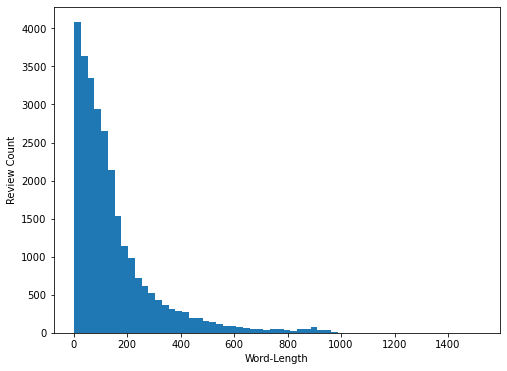

In [ ]:
#plot distribution of lengths to see potential quality issues
plt.figure(figsize=(8, 6))
plt.hist(length_words, bins=60)
plt.ylabel('Review Count')
plt.xlabel('Word-Length')

In [ ]:
# Some reviews are just 1 word long and other over 400, which is too much. We would have to filter some of the reviews out. 
# Short reviews may not be a problem, but if the review is too long, maybe is too redundant.

In [ ]:
df['word_length'] = length_words
df[df['word_length'] <= 4].sample(10)

,Unnamed: 0,Type,Make,Model,Year,Total_star,Review,Safety,Technology,Performance,Interior,Comfort,Reliability,Value,word_length
13408,20582,Sedans,lincoln,mkz,2017,5,Great Value,5,5,5,0,5,0,5,2
16245,24738,Hybrids,lexus,rx-450h,2016,5,Very dependable... high quality,5,5,5,5,5,5,5,4
10390,16415,Trucks,toyota,tundra,2020,5,Look around,5,5,5,5,5,5,5,2
15666,23807,Hybrids,honda,cr-v-hybrid,2021,3,Acceptable- not bad,0,0,0,0,0,0,0,3
13466,20696,Sedans,mercedes-benz,s-class,2015,5,very. comfortable and luxurious,5,4,5,5,5,5,5,4
18175,27263,Convertibles,mercedes-benz,c-class,2019,5,Great car,5,5,5,5,5,5,5,2
11307,17710,Sedans,mazda,6,2018,5,Great alternative to suv.,0,0,5,0,5,0,0,4
9210,14504,Trucks,toyota,tacoma,2020,5,Excellent vehicle,5,5,5,5,4,5,5,2
94,100,SUVs,mazda,cx-30,2020,5,Love it!,0,0,0,0,0,0,0,2
3462,5723,SUVs,toyota,4runner,2020,5,Great car!!,0,0,0,0,0,0,0,2


In [ ]:
aux = df.loc[df['word_length'] >= 300, "Review"].sample(10)
aux.iloc[1,]
# Long reviews contain too much information that is in most cases redundant, so we will filter those out

"I can go l over 540 miles from a full tank, and the tank isnt big. It is about 11 gallons.  I'm watching all these poor souls trying to leave South Florida in a storm not knowing where they will get gas Im thinking why didnt they buy a hybrid!!!  Maybe they will learn someday.  I have had it over 2 years  and it performs well. Not a huge amount of power like some gas cars but far more than enough for my needs and it can pass fairly well too.   Runs so quiet I sometimes try to leave it when its still running!  If I do an alarm will sound.  It has handles that light up door handle when I approach. Lights that go on when it gets dark, and lots more. I have the LX model.  I bought it from a dealer who offered the 20 year 200,000 warranty. Most offer  10 year.  Read any warranty papers very carefully and make sure you keep up your maintenance or the warranty is void. It takes full synthetic oil. I am taking it to KIA dealers to make sure records are proper. Shop around. I have found differ

In [ ]:
df[df['word_length']>=300].shape
# We will exclude 3421 reviews

(3421, 15)

In [ ]:
below_300 = df[df['word_length']<300]

In [ ]:
df = below_300
df.shape

(24226, 15)

## Language Cleaning & Remove Duplicates

In [ ]:
#There are some reviews that are not in english
df['Review'].iloc[9]

'Me encanta su manejo, y su poder cómodo y me siento segura.'

In [ ]:
#check language of reviews
language = []
for i in range(df.shape[0]):
    language.append(detect((df['Review'].iloc[i])))

In [ ]:
# There are some reviews that are not in english, but there are some missclassifications as well
df['language'] = language
df[df['language']!= 'en'].shape

<ipython-input-64-44f3cb37fa20>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['language'] = language


(325, 16)

In [ ]:
df[df['language']!= 'en'].sample(10)

,Unnamed: 0,Type,Make,Model,Year,Total_star,Review,Safety,Technology,Performance,Interior,Comfort,Reliability,Value,word_length,language
19359,2862,Sedans,dodge,charger,2016,3,nan,3,3,2,0,3,0,0,1,tl
27020,46,Convertibles,mazda,mx-5-miata,2016,5,nan,4,5,5,4,4,5,5,1,tl
27550,249,Minivans,honda,odyssey,2022,5,Love my new van,5,5,5,5,5,5,5,4,sk
25353,322,Hatchbacks,volkswagen,golf,2016,5,nan,0,5,5,5,4,5,5,1,tl
23635,1240,Hybrids,toyota,prius,2018,5,"Reliability, fuel economy, handling, resale va...",5,5,5,5,4,5,5,6,es
12834,12834,SUVs,lincoln,aviator,2020,5,quite and comfortable,5,5,4,5,5,5,5,3,fr
5756,5756,SUVs,toyota,4runner,2021,5,Love my 4 runner!!!!,5,5,5,5,5,5,5,4,no
16209,2359,Trucks,toyota,tundra,2017,5,Excellent Value! Great quality!,5,4,4,4,4,5,5,4,ca
18974,2477,Sedans,chrysler,300,2015,4,nan,5,5,4,5,5,5,5,1,tl
20587,4090,Sedans,lincoln,mkz,2017,5,Great car!,5,5,4,5,5,5,5,2,ro


In [ ]:
df[df['language']== 'es'].sample(5)

,Unnamed: 0,Type,Make,Model,Year,Total_star,Review,Safety,Technology,Performance,Interior,Comfort,Reliability,Value,word_length,language
10346,10346,SUVs,volvo,xc40,2019,5,Safe Car- Fun Car,5,5,5,5,5,0,0,4,es
10,10,SUVs,volkswagen,taos,2022,5,"Me encanta su manejo, y su poder cómodo y me s...",5,5,5,5,5,5,5,12,es
1398,1398,SUVs,honda,hr-v,2021,5,Cómodo amplio y suave al manejar. Tiene la suf...,5,4,4,4,5,5,5,18,es
3812,3812,SUVs,volkswagen,tiguan,2021,5,Excelente vehículo y muy confortable!!,5,4,5,5,5,4,5,5,es
4024,4024,SUVs,volkswagen,atlas-cross-sport,2021,4,Cross sport SE R-line /Tech es el mas espacios...,5,4,5,4,5,4,4,109,es


In [ ]:
df[df['language']== 'es'].shape

(11, 16)

In [ ]:
# First thing that we notice is that there are some reviews that are in english but it missclassifies it to another language, 
# so we can't just exclude all reviews that are not in english.

# Second thing is that there are some 'nan' reviews that we should exclude

# Third is that most of the reviews that are not in english, are in spanish, so we could just exclude those ones. But we will
# do it manually because there are some missclassifications as well

# We also notice that there are some duplicates reviews

In [ ]:
# Exclude Reviews with nan - there are 87 of them
df[df['Review']== "nan"].shape

(87, 16)

In [ ]:
df = df[df['Review']!= "nan"]

In [ ]:
# Manually exclude those reviews in spanish
df[df['language']== 'es']

,Unnamed: 0,Type,Make,Model,Year,Total_star,Review,Safety,Technology,Performance,Interior,Comfort,Reliability,Value,word_length,language
10,10,SUVs,volkswagen,taos,2022,5,"Me encanta su manejo, y su poder cómodo y me s...",5,5,5,5,5,5,5,12,es
1398,1398,SUVs,honda,hr-v,2021,5,Cómodo amplio y suave al manejar. Tiene la suf...,5,4,4,4,5,5,5,18,es
3812,3812,SUVs,volkswagen,tiguan,2021,5,Excelente vehículo y muy confortable!!,5,4,5,5,5,4,5,5,es
3985,3985,SUVs,honda,passport,2021,5,Muy cómodo rápido silencioso,5,4,5,5,5,5,5,4,es
4024,4024,SUVs,volkswagen,atlas-cross-sport,2021,4,Cross sport SE R-line /Tech es el mas espacios...,5,4,5,4,5,4,4,109,es
7653,7653,SUVs,honda,pilot,2022,5,"Es Espacioso,Elegante,Confortable! Lo amé",4,5,5,5,5,5,5,4,es
10346,10346,SUVs,volvo,xc40,2019,5,Safe Car- Fun Car,5,5,5,5,5,0,0,4,es
13726,13726,SUVs,audi,sq5,2020,5,Replaces Q5TDI,0,0,0,0,0,0,0,2,es
23635,1240,Hybrids,toyota,prius,2018,5,"Reliability, fuel economy, handling, resale va...",5,5,5,5,4,5,5,6,es
26394,934,Coupes,dodge,challenger,2016,5,Fun car to drive!! All pros no cons!!!!,5,5,5,5,5,0,5,8,es


In [ ]:
list_spanish = [10, 1398, 3812, 3985, 4024, 7653]
df.drop(list_spanish, inplace = True)

C:\Users\sergio.abbate\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
# Remove the index column and then duplicates
df = df.iloc[: , 1:]

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
#There were a lot of duplicates reviews
df.shape

(18449, 15)

In [ ]:
# The reviews that were not labeled in english are actually all in english
df[df['language']!= 'en'].sample(5)

,Type,Make,Model,Year,Total_star,Review,Safety,Technology,Performance,Interior,Comfort,Reliability,Value,word_length,language
10042,SUVs,toyota,sequoia,2012,5,Value,0,0,0,0,0,0,0,1,fi
5316,SUVs,toyota,4runner,2014,5,Comfortable & roomy yet sleek,0,0,0,0,0,0,0,5,no
26570,Coupes,dodge,challenger,2019,5,A gem,0,0,0,0,0,0,0,2,nl
19741,Sedans,bmw,3-series,2020,5,Best car I have driven ever,5,5,5,5,5,5,5,6,da
3607,SUVs,mitsubishi,outlander,2022,5,Best ever,5,5,5,5,5,5,5,2,no


In [ ]:
# Our dataset is now processed and clean
# Delete the redundant columns and export

In [ ]:
df.drop(['language'],axis = 1, inplace = True)
df.drop(['word_length'],axis = 1, inplace = True)

In [ ]:
df.to_csv("data_cleaned.csv")